In [1]:
#import libaries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#create a path
path = r"C:\Users\jacob\Documents\Data Analytics\Data Immersion\Achievement 6\Energy_GDP_Project"

In [4]:
#import data
df = pd.read_csv(os.path.join(path, '02 data', 'prepared data', 'energy_gdp_merged_inner_countries.csv'))

### Data Cleaning and Consistency Checks

In [5]:
df.shape

(4730, 8)

In [6]:
df.head()

,country,year,combined_key,ea_%_pop,%_energy_nuclear,%_energy_renewables,%_energy_fossil_fuels,gdp
0,Afghanistan,2000,"Afghanistan, 2000",4.446891,0.0,0.0,0.0,183.532775
1,Afghanistan,2001,"Afghanistan, 2001",9.294527,0.0,0.0,0.0,183.532775
2,Afghanistan,2002,"Afghanistan, 2002",14.133616,0.0,0.0,0.0,183.532775
3,Afghanistan,2003,"Afghanistan, 2003",18.971165,0.0,0.0,0.0,200.462376
4,Afghanistan,2004,"Afghanistan, 2004",23.814182,0.0,0.0,0.0,221.657662


In [7]:
df.drop(columns = ['combined_key'], inplace = True)

In [8]:
df.rename(columns = {'gdp' : 'gdp_per_capita'}, inplace = True)

In [9]:
df.head()

,country,year,ea_%_pop,%_energy_nuclear,%_energy_renewables,%_energy_fossil_fuels,gdp_per_capita
0,Afghanistan,2000,4.446891,0.0,0.0,0.0,183.532775
1,Afghanistan,2001,9.294527,0.0,0.0,0.0,183.532775
2,Afghanistan,2002,14.133616,0.0,0.0,0.0,183.532775
3,Afghanistan,2003,18.971165,0.0,0.0,0.0,200.462376
4,Afghanistan,2004,23.814182,0.0,0.0,0.0,221.657662


In [10]:
df.describe()

,year,ea_%_pop,%_energy_nuclear,%_energy_renewables,%_energy_fossil_fuels,gdp_per_capita
count,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000,4730.000000
mean,2003.887315,80.461152,4.368226,1.980537,39.638463,13941.936532
std,7.055844,30.087069,13.008783,5.284833,39.220871,21058.857897
min,1990.000000,0.533899,0.000000,0.000000,0.000000,110.460875
25%,1998.000000,69.710360,0.000000,0.000000,0.000000,1323.236545
50%,2004.000000,99.000000,0.000000,0.000000,32.016672,4832.516478
75%,2010.000000,100.000000,0.000000,1.051397,78.820447,19446.456570
max,2015.000000,100.000000,87.986221,65.443742,100.000000,204097.210000


In [11]:
df.isnull().sum()

country                  0
year                     0
ea_%_pop                 0
%_energy_nuclear         0
%_energy_renewables      0
%_energy_fossil_fuels    0
gdp_per_capita           0
dtype: int64

In [12]:
df.duplicated().sum()

0

C:\Users\jacob\AppData\Local\Temp\ipykernel_25128\4189967182.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gdp_per_capita'], bins=25)
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_i

<Axes: xlabel='gdp_per_capita', ylabel='Density'>

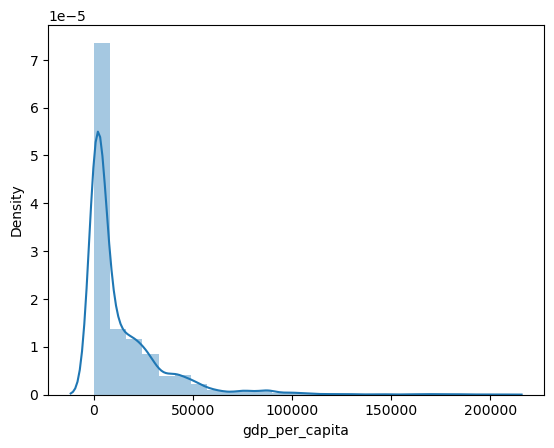

In [13]:
sns.distplot(df['gdp_per_capita'], bins=25)

### Prep Data for Regression

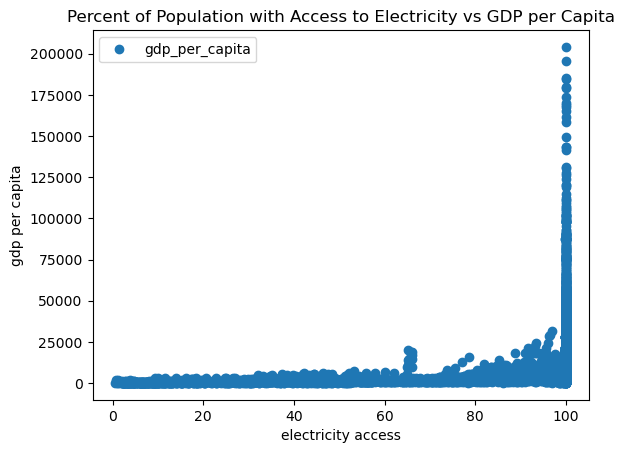

In [14]:
df.plot(x = 'ea_%_pop', y='gdp_per_capita',style='o')
plt.title('Percent of Population with Access to Electricity vs GDP per Capita')  
plt.xlabel('electricity access')  
plt.ylabel('gdp per capita')  
plt.show()

From Exercise 6.2 I also found that the relationship between electricity access and gdp per capita has the highest correlation, so I will use these two variables for my data. I think I will also see if on is stronger in the other for prediciting outcomes.

In this case my hypothesis would be:
As the percent of the population with access to electricity increase, gdp per capita will also increase.

### Create X and y arrays

In [33]:
#reshape variables into Numpy arrays X and y
X = df['ea_%_pop'].values.reshape(-1,1)
y = df['gdp_per_capita'].values.reshape(-1,1)

In [16]:
#check arrays
X

array([[ 4.44689083],
       [ 9.29452705],
       [14.13361645],
       ...,
       [40.64416122],
       [32.3       ],
       [33.7       ]])

In [17]:
y

array([[ 183.5327752],
       [ 183.5327752],
       [ 183.5327752],
       ...,
       [1408.36781  ],
       [1407.034291 ],
       [1410.329173 ]])

In [18]:
#create a training set and a a test set for both variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [19]:
# Create a regression object.

regression = LinearRegression() 

In [20]:
#fit the regression line to the X and y training sets
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
#predict the values of y using X
y_predicted = regression.predict(X_test)

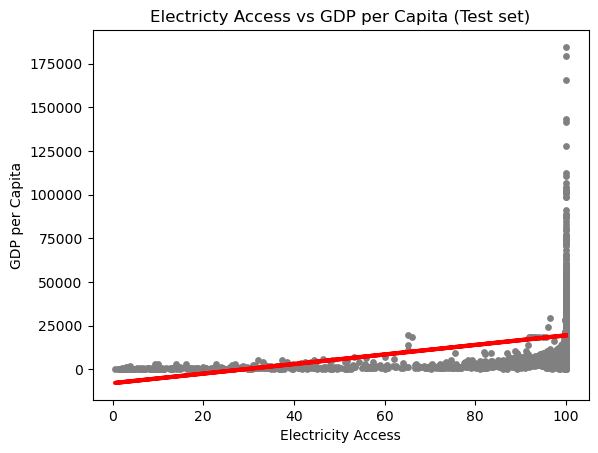

In [22]:
#plot regression line from the model for the test

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Electricty Access vs GDP per Capita (Test set)')
plot_test.xlabel('Electricity Access')
plot_test.ylabel('GDP per Capita')
plot_test.show()

The regression line does not fit the data very well. It could be argued that high values of GDP per Capita are altering the chart. I hesitate to remove them because I have doubeld checked the data and there are countries with high GDPs as shown. I am thinking that one possibility would be to focus this data more on developing countries (GDP per capita of 50,000 or less) I might try running one to see if I get a better fit. 

In [41]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [24]:
#print summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[273.8599015]]
Mean squared error:  364686357.14128953
R2 score:  0.14784510959078456


In [25]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1894.460083,19415.387777
1,373.893959,-1436.818096
2,16908.847960,19446.727838
3,1627.064997,19446.727838
4,18780.127510,19446.727838
5,832.427320,9478.227424
6,3427.505755,13562.814258
7,8153.299101,17916.627154
8,1133.105461,19282.411897
9,1148.514188,18684.580698


I think the model did a poor job. I think the data is skewed because of some of the countries with really high GDPs per Capita. To me this would make sense, because there is probably a threshold where economic development is no longer impacted by electricity access because people have had access for a long time. On the other hand, a developing country that just got electricity, I would imagine that would have a greater impact on economic development.

In [26]:
df_dev = df[df['gdp_per_capita'] <= 50000]

In [27]:
df_dev.head()

,country,year,ea_%_pop,%_energy_nuclear,%_energy_renewables,%_energy_fossil_fuels,gdp_per_capita
0,Afghanistan,2000,4.446891,0.0,0.0,0.0,183.532775
1,Afghanistan,2001,9.294527,0.0,0.0,0.0,183.532775
2,Afghanistan,2002,14.133616,0.0,0.0,0.0,183.532775
3,Afghanistan,2003,18.971165,0.0,0.0,0.0,200.462376
4,Afghanistan,2004,23.814182,0.0,0.0,0.0,221.657662


In [28]:
df_dev.shape

(4462, 7)

C:\Users\jacob\AppData\Local\Temp\ipykernel_25128\2846388375.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_dev['gdp_per_capita'], bins=25)
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\users\jacob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

<Axes: xlabel='gdp_per_capita', ylabel='Density'>

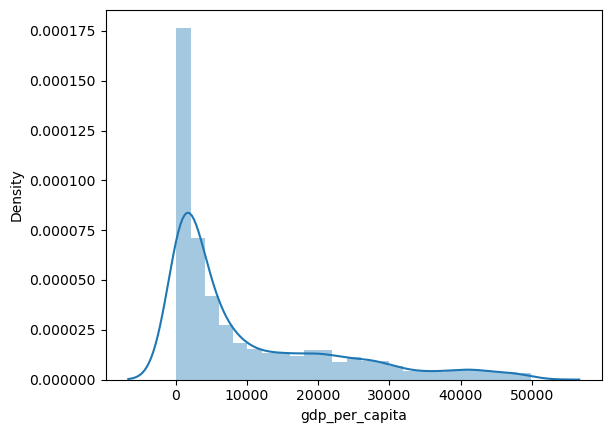

In [30]:
sns.distplot(df_dev['gdp_per_capita'], bins=25)

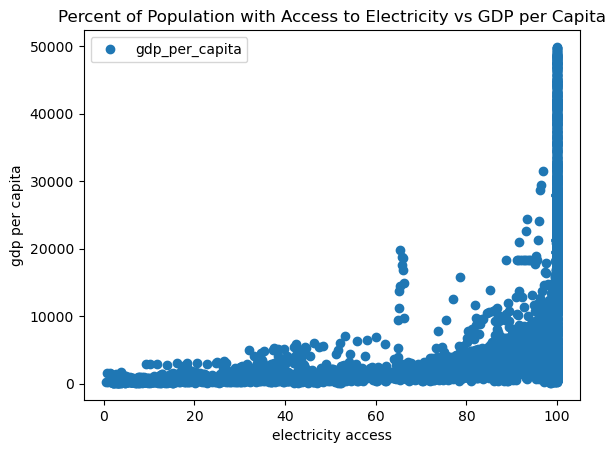

In [29]:
df_dev.plot(x = 'ea_%_pop', y='gdp_per_capita',style='o')
plt.title('Percent of Population with Access to Electricity vs GDP per Capita')  
plt.xlabel('electricity access')  
plt.ylabel('gdp per capita')  
plt.show()

In [32]:
#reshape variables into Numpy arrays X and y
X2 = df_dev['ea_%_pop'].values.reshape(-1,1)
y2 = df_dev['gdp_per_capita'].values.reshape(-1,1)

In [34]:
X2

array([[ 4.44689083],
       [ 9.29452705],
       [14.13361645],
       ...,
       [40.64416122],
       [32.3       ],
       [33.7       ]])

In [35]:
y2

array([[ 183.5327752],
       [ 183.5327752],
       [ 183.5327752],
       ...,
       [1408.36781  ],
       [1407.034291 ],
       [1410.329173 ]])

In [36]:
#create a training set and a a test set for both variables
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [37]:
#fit the regression line to the X and y training sets
regression.fit(X2_train, y2_train)

LinearRegression()

In [38]:
#predict the values of y using X
y2_predicted = regression.predict(X2_test)

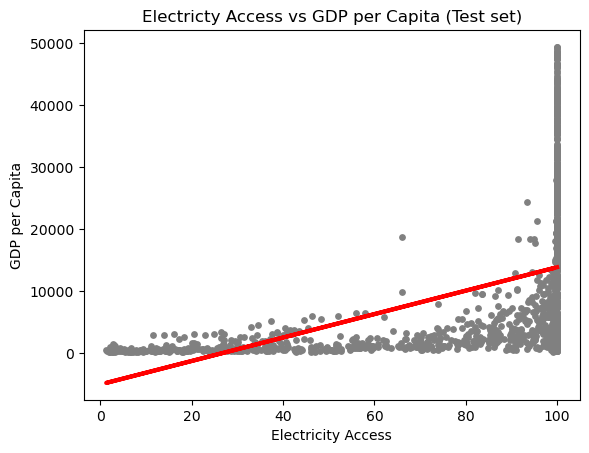

In [39]:
plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('Electricty Access vs GDP per Capita (Test set)')
plot_test.xlabel('Electricity Access')
plot_test.ylabel('GDP per Capita')
plot_test.show()

In [42]:
rmse_2 = mean_squared_error(y2_test, y2_predicted) 
r2_2 = r2_score(y2_test, y2_predicted)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[189.28967615]]
Mean squared error:  116632086.16141994
R2 score:  0.2428993919400262


The regression line fits okay, now, it is better than before. GDP per Capita of 50,000 might not have been low enough. But it is moving things in the right direction. I can keep looking into to this.

Let me know what you think!